In [2]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] =10000000000000000000000000.0
import cmocean

In [4]:
%pwd

'/work0/eay/MITgcm_data'

In [49]:
runs = [24,   25,   26,   27,   28,   29,   30,   31,   32]
Av   = np.array([1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 2e-4, 1e-3, 1e-4]) #vertical viscosity in m^2/s
Tau  = np.array([0.03, 0.05, 0.00, 0.03, 0.03, 0.10, 0.10, 0.10, 0.03]) #wind forcing in Pa

NX = 600
NY = 1000
NZ = 120
hf_alongshore_diag=np.zeros((len(runs))); hf_alongshore_diag[:]=np.nan

for i in runs:
    print(i)
    if i==31:
        file0 = nc.Dataset('/work0/eay/MITgcm_data/Experiment%i/Temp2.nc'%i)
        file1 = nc.Dataset('/work0/eay/MITgcm_data/Experiment%i/Salt2.nc'%i)
        file2 = nc.Dataset('/work0/eay/MITgcm_data/Experiment%i/U2.nc'%i)
        file3 = nc.Dataset('/work0/eay/MITgcm_data/Experiment%i/V2.nc'%i)
        #index = 33 #for day=2.27
        index=-1

    else:
        file0 = nc.Dataset('/work0/eay/MITgcm_data/Experiment%i/Temp.nc'%i)
        file1 = nc.Dataset('/work0/eay/MITgcm_data/Experiment%i/Salt.nc'%i)
        file2 = nc.Dataset('/work0/eay/MITgcm_data/Experiment%i/U.nc'%i)
        file3 = nc.Dataset('/work0/eay/MITgcm_data/Experiment%i/V.nc'%i)
        xq = (file1.variables['X'][:])
        yq = (file1.variables['Y'][:])
        zl = (file1.variables['Z'][:])
        Time = file1.variables['T'][:]
        #index = 109 #for day=2.27
        index=-1 #for day=2.27
      
    xqmat=np.tile(xq,(NY,1))
    yqmat=np.tile(yq,(NX,1))
    yqmat=np.transpose(yqmat)
    
    
    mask = file1.variables['S'][0,0,:,:]
    newmask = file1.variables['S'][0,:,:,:]

    Salt = file1.variables['S'][index,:,:,:]; Salt[newmask==0]=np.nan
    Sref = Salt*0.0+34.0
    hf=0.1*np.nansum((Sref-Salt)/34.0,axis=0)
    hf[(mask==0)]=np.nan
    hf_alongshore = np.nansum(hf*100,axis=0) #100m grid spacing
    hf_alongshore_diag[i-24]=np.nansum(hf_alongshore[350:600])/np.nansum(hf_alongshore[100:600])


print(Time.shape)
print(yqmat.shape)
print(xqmat.shape)
%cd /work0/eay/MITgcm_data/

24
25
26
27
28
29
30
31
32
(150,)
(1000, 600)
(1000, 600)
/work0/eay/MITgcm_data


In [6]:
print(file3)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    MITgcm_version: checkpoint67q
    build_user: Elizabeth.Yankovsky
    build_host: gaea9
    build_date: Fri Apr 23 02:37:42 EDT 2021
    MITgcm_URL: http://mitgcm.org
    MITgcm_tag_id: 
    MITgcm_mnc_ver: 0.9
    sNx: 15
    sNy: 25
    OLx: 3
    OLy: 3
    nSx: 1
    nSy: 1
    nPx: 40
    nPy: 40
    Nx: 600
    Ny: 1000
    Nr: 250
    dimensions(sizes): T(150), Xp1(601), Y(1000), Z(250), X(600), Yp1(1001), Zl(250)
    variables(dimensions): float64 Xp1(Xp1), float64 Y(Y), float64 Z(Z), float64 X(X), float64 Yp1(Yp1), float64 Zl(Zl), float64 T(T), float32 V(T,Z,Yp1,X)
    groups: 



In [41]:
print(Tau/Av)
print(Tau[0],Av[0])

[ 300.  500.    0.  300.  300. 1000.  500.  100.  300.]
0.03 0.0001


In [50]:
x_value=Tau/(1025*(2*Av*8.0e-5)**0.5)  #tau/(rho*sqrt(2*Av*f))
y_value=hf_alongshore_diag

In [46]:
x_value_24extra = x_value[0]
y_value_24extra = y_value[0]

x_value_25extra = x_value[1]
y_value_25extra = y_value[1]

x_value_30extra = x_value[6]
y_value_30extra = y_value[6]

0
1
2
3
4
5
6
7
8


Text(0.5, 1.0, 'End of simulation')

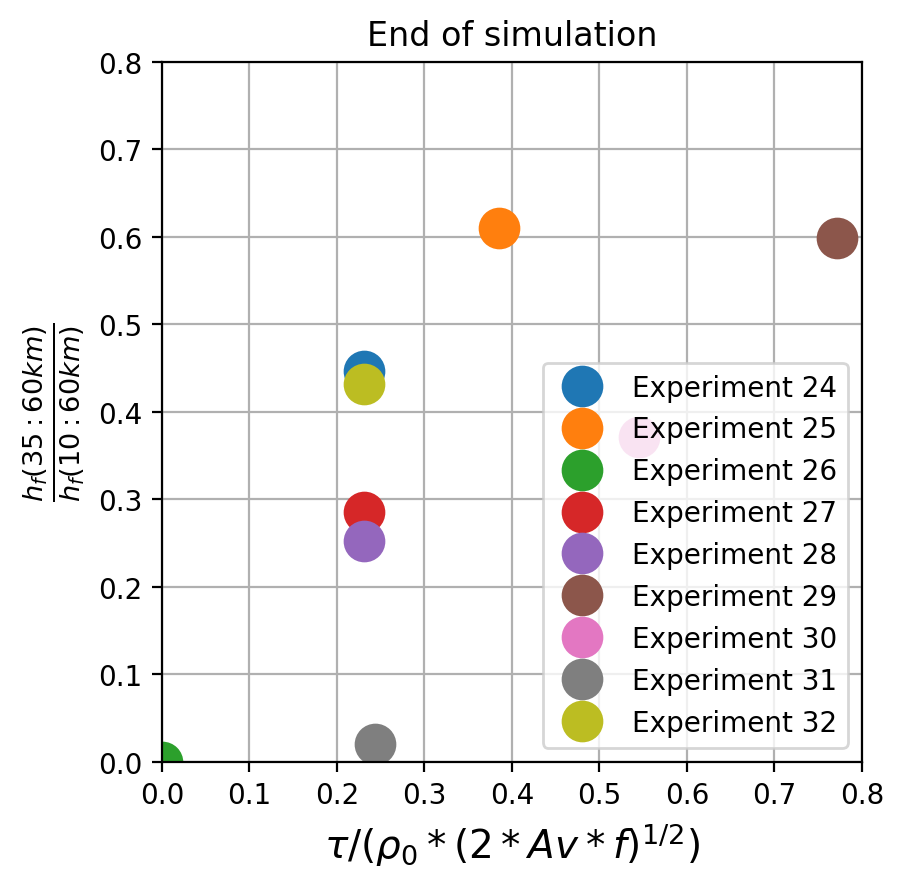

In [13]:
fig = plt.figure(figsize=(5, 5), dpi= 200, facecolor='w', edgecolor='k')

ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)

for i in range(0,len(x_value)):
    print(i)
    ax1.plot(x_value[i],y_value[i],'o',label='Experiment %i'%(i+24),markersize=14)
ax1.set_xlabel(r'$\tau/(\rho_0*(2*Av*f)^{1/2})$',fontsize=14)
ax1.set_ylabel(r'$\frac{h_f(35:60km)}{h_f(10:60km)}$',fontsize=14) #{hf(10:35km)}{$hf(10:60km)}
ax1.set_xlim([0,0.8]);ax1.set_ylim([0,0.8])

plt.legend(fontsize=10)
plt.grid()
#ax1.set_aspect('equal')
plt.title('End of simulation')

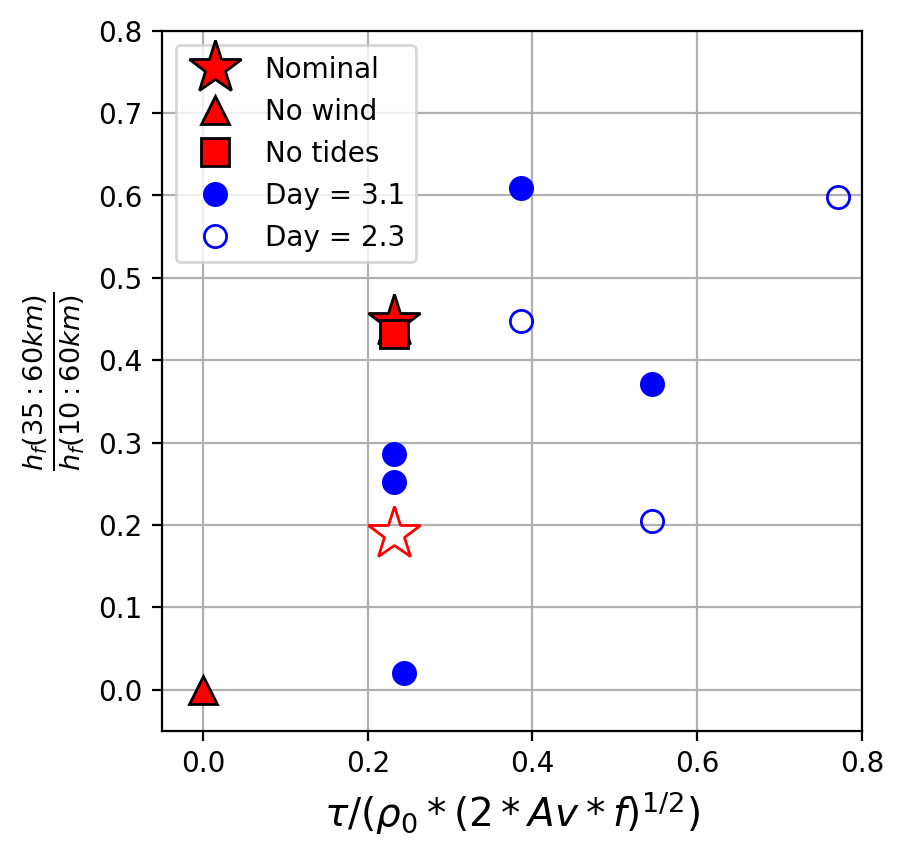

In [56]:
fig = plt.figure(figsize=(5, 5), dpi= 200, facecolor='w', edgecolor='k')

ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)

## NOMINAL
ax1.plot(x_value[0],y_value[0],'*',color='r',markeredgecolor='k',label='Nominal',markersize=20) #experiment 24
ax1.plot(x_value[1],y_value[1],'o',color='b',markersize=8) #experiment 25
##NO WIND
ax1.plot(x_value[2],y_value[2],'^',color='r',markeredgecolor='k',label='No wind',markersize=10) #experiment 26
ax1.plot(x_value[3],y_value[3],'o',color='b',markersize=8) #experiment 27
ax1.plot(x_value[4],y_value[4],'o',color='b',markersize=8) #experiment 28
ax1.plot(x_value[5],y_value[5],'o',color='b', mfc='none',markersize=8) #experiment 29
ax1.plot(x_value[6],y_value[6],'o',color='b',markersize=8) #experiment 30
## NO TIDE
ax1.plot(x_value[8],y_value[8],'s',color='r',markeredgecolor='k',label='No tides',markersize=10) #experiment 32
ax1.plot(x_value[7],y_value[7],'o',color='b',markersize=8,label='Day = 3.1') #experiment 31


ax1.plot(x_value_24extra,y_value_24extra,'*',color='r', mfc='none',markersize=20) #experiment 24
ax1.plot(x_value_25extra,y_value_25extra,'o',color='b', mfc='none',label='Day = 2.3',markersize=8) #experiment 25
ax1.plot(x_value_30extra,y_value_30extra,'o',color='b', mfc='none',markersize=8) #experiment 30

ax1.set_xlabel(r'$\tau/(\rho_0*(2*Av*f)^{1/2})$',fontsize=14)
ax1.set_ylabel(r'$\frac{h_f(35:60km)}{h_f(10:60km)}$',fontsize=14) #{hf(10:35km)}{$hf(10:60km)}
ax1.set_xlim([-.05,0.8]);ax1.set_ylim([-.05,0.8])

plt.legend(fontsize=10,loc='upper left')
plt.grid()
ax1.set_aspect('equal')


In [15]:
x_value.shape

(9,)